# Chronic Kidney Disease Prediction

In [104]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score

In [105]:
#Reading the dataset
raw_data = pd.read_csv(r'/Users/jerryreddy/Documents/kidney_disease (2).csv')
raw_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## All feature details and how they effect kidney performance in human body.

bp / htn: The diastolic pressure, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. This is what your diastolic blood pressure number means:

Normal: Lower than 80
Stage 1 hypertension: 80-89
Stage 2 hypertension: 90 or more
Hypertensive crisis: 120 or more.
sg : Urine specific gravity is a laboratory test that shows the concentration of all chemical particles in the urine.

al : The albumin urine test measures the amount of albumin in a urine sample. Albuminuria is a sign of kidney disease and means that you have too much albumin in your urine. Albumin is a protein found in the blood. A healthy kidney doesn’t let albumin pass from the blood into the urine. A damaged kidney lets some albumin pass into the urine. The less albumin in your urine, the better.

su : The glucose urine test measures the amount of sugar (glucose) in a urine sample. The presence of glucose in the urine is called glycosuria or glucosuria. Glucose is not usually found in urine. If it is, further testing is needed. Normal glucose range in urine: 0 to 0.8 mmol/l (0 to 15 mg/dL)

rbc / rc : Red blood cells are one of the major components of blood, along with white blood cells and platelets. Red blood cells help carry oxygen throughout the body. A high red blood cell count means the number of red blood cells in your bloodstream is higher than normal. Normal red blood cell counts are:

For men, 4.7 to 6.1 million red blood cells per microliter of blood
For women, 4.2 to 5.4 million red blood cells per microliter of blood
For children, 4.0 to 5.5 million red blood cells per microliter of blood


pc / pcc: Presence of pus cells in urine defined as pyuria is an important accompaniment of bacteriuria which may be asymptomatic or can indicate toward underlying urinary tract infection.

ba : Presence of bacteria in urine .

bgr / dm: Random glucose testing is a blood test done at a random moment of the day to check glucose (sugar) levels. values of 200 mg/dL or above can indicate diabetes.

bu : A blood urea nitrogen (BUN) test measures the amount of nitrogen in your blood that comes from the waste product urea. Urea is made when protein is broken down in your body. Urea is made in the liver and passed out of your body in the urine. A BUN test is done to see how well your kidneys are working. In general, around 6 to 24 mg/dL (2.1 to 8.5 mmol/L) is considered normal.

sc : Creatinine is a waste product that comes from the normal wear and tear on muscles of the body. Everyone has creatinine in their bloodstream. The normal level of creatinine depends on your age, race, gender, and body size. In general , a normal result is 0.7 to 1.3 mg/dL for men and 0.6 to 1.1 mg/dL for women.

sod : A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.

pot : Normally, your blood potassium level is 3.6 to 5.2 millimoles per liter (mmol/L). A very low potassium level (less than 2.5 mmol/L ) can be life-threatening and requires urgent medical attention.

hemo / ane : A hemoglobin test measures the amount of hemoglobin in your blood. Hemoglobin is a protein in your red blood cells that carries oxygen to your body's organs and tissues and transports carbon dioxide from your organs and tissues back to your lungs. An Hb value less than 5.0 g/dL can lead to heart failure and death. The normal range for hemoglobin is:

For men, 13.5 to 17.5 grams per deciliter
For women, 12.0 to 15.5 grams per deciliter
Anything below that is considered a form of anemia.

pcv : The packed cell volume (PCV) is a measurement of the proportion of blood that is made up of cells. The value is expressed as a percentage or fraction of cells in blood. For example, a PCV of 40% means that there are 40 millilitres of cells in 100 millilitres of blood. Critical value are <18% and >55% (for adults)

wbcc: White blood cell count varies from person to person , the normal range is usually between 4,000 and 11,000 white blood cells per microlitre of blood. Anything below 4,000 is typically considered to be a low white blood cell count.

cad : The coronary arteries supply blood, oxygen and nutrients to your heart. Coronary artery disease develops when the coronary arteries become damaged or diseased. The damage may be caused by various factors (Smoking / High blood pressure /High cholesterol /Diabetes /sedentary lifestyle...)

appet : Appetite is the desire to eat food, sometimes due to hunger. A poor appetite is when your desire to eat is reduced. The medical term for a loss of appetite is anorexia. Any illness can reduce appetite. If the illness is treatable, the appetite should return when the condition is cured.

pe : Pedal edema causes an abnormal accumulation of fluid in the ankles, feet, and lower legs causing swelling of the feet and ankles. Two mechanisms can cause edema of the feet. two most commun causes are being overweight and standing or sitting for long periods.

#TARGET VARIABLE
classification: Kidney performance (ckd (good) or notckd (not good)).

## Problem/Task Framing

Since the dataset have a target variable (classification) with only 2 values: ckd(good)  / notckd (notgood), this is purely a classificaton task and that too, a binary classification is required performed with respect to this dataset.

So, this task/problem is being framed as binary classification task.

In [106]:
#Can drop hemoglobin, rc columns as these columns have same replicated categorical columns: ane, rbc respectively.
raw_data = raw_data.drop(['id', 'hemo', 'rc'], axis=1)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  htn             398 non-null    object 
 17  dm              398 non-null    obj

/var/folders/1f/mxtctw2x76d5t6hjj9p6_9hc0000gn/T/ipykernel_56157/3097667811.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, entire_col in raw_data.iteritems():


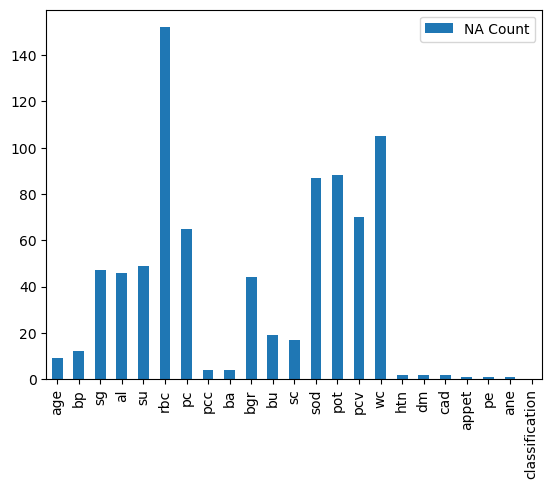

In [107]:
#Preparing the information (Series) that contains the column name and number of null values present in each column.
col_names = []
na_count = []
for col_name, entire_col in raw_data.iteritems():
    col_names.append(col_name)
    na_count.append(len(raw_data[entire_col.isna()]))

col_na_info = pd.Series(na_count, index=col_names, name='NA Count')
ax = col_na_info.plot.bar()
ax.legend()

/var/folders/1f/mxtctw2x76d5t6hjj9p6_9hc0000gn/T/ipykernel_56157/746337578.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, entire_col in raw_data.iteritems():


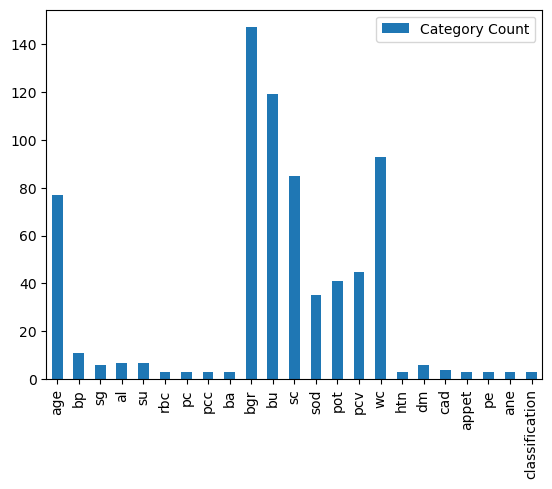

In [108]:
#Preparing the information (Series) that contains the column name and unique values in every column.
col_names = []
unique_value_count = []
col_info = dict()
for col_name, entire_col in raw_data.iteritems():
    col_names.append(col_name)
    unique_value_count.append(len(entire_col.unique()))
    col_info[col_name] = len(entire_col.unique())

col_type_info = pd.Series(unique_value_count, index=col_names, name='Category Count')
ax = col_type_info.plot.bar()
ax.legend()

## Feature Engineering

**Observations**:

-> As there is '\t' in some columns..data cleaning is needed

-> Classification should b only ckd or notckd but there is also 'ckd\t' which should be ckd only.Hence data cleaning is much needed

-> Columns which contains '\t' are: pcv, wc, rc, dm, cad, classification

## Cleaning the columns data

In [109]:
#Updating the improper values with right values in all required columns.
raw_data.loc[raw_data['cad']=='\tno', 'cad'] = 'no'
raw_data.loc[raw_data['classification']=='ckd\t', 'classification'] = 'ckd'
raw_data.loc[raw_data['pcv']=='\t43', 'pcv'] = 43
raw_data.loc[raw_data['pcv']=='\t?', 'pcv'] = np.NaN
raw_data.loc[raw_data['wc']=='\t?', 'wc'] = np.NaN
raw_data.loc[raw_data['dm']=='\tno', 'dm'] = 'no'
raw_data.loc[raw_data['dm']=='\tyes', 'dm'] = 'yes'
raw_data.loc[raw_data['dm']==' yes', 'dm'] = 'yes'
raw_data.loc[raw_data['wc']=='\t6200', 'wc'] = '6200'
raw_data.loc[raw_data['wc']=='\t8400', 'wc'] = '8400'

In [110]:
#changing the 'pcv' & 'wc' columns from object type to float type as they have continous number values.
raw_data['pcv'] = raw_data['pcv'].astype(float)
raw_data['wc'] = raw_data['wc'].astype(float)

## Handling Missing Values: Fill up empty/na values in all columns.

In [111]:
for col_name in raw_data.columns:
    if(raw_data[col_name].dtype=='object'):
        raw_data[col_name]=raw_data[col_name].fillna(raw_data[col_name].mode()[0])
    else:
        raw_data[col_name]=raw_data[col_name].fillna(raw_data[col_name].mean()) 

In [112]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  pcv             400 non-null    float64
 15  wc              400 non-null    float64
 16  htn             400 non-null    object 
 17  dm              400 non-null    obj

In [113]:
#checking the duplicate instances in the dataset.
raw_data.duplicated().sum()

0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'sg'}>],
       [<Axes: title={'center': 'al'}>, <Axes: title={'center': 'su'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sc'}>,
        <Axes: title={'center': 'sod'}>],
       [<Axes: title={'center': 'pot'}>, <Axes: title={'center': 'pcv'}>,
        <Axes: title={'center': 'wc'}>]], dtype=object)

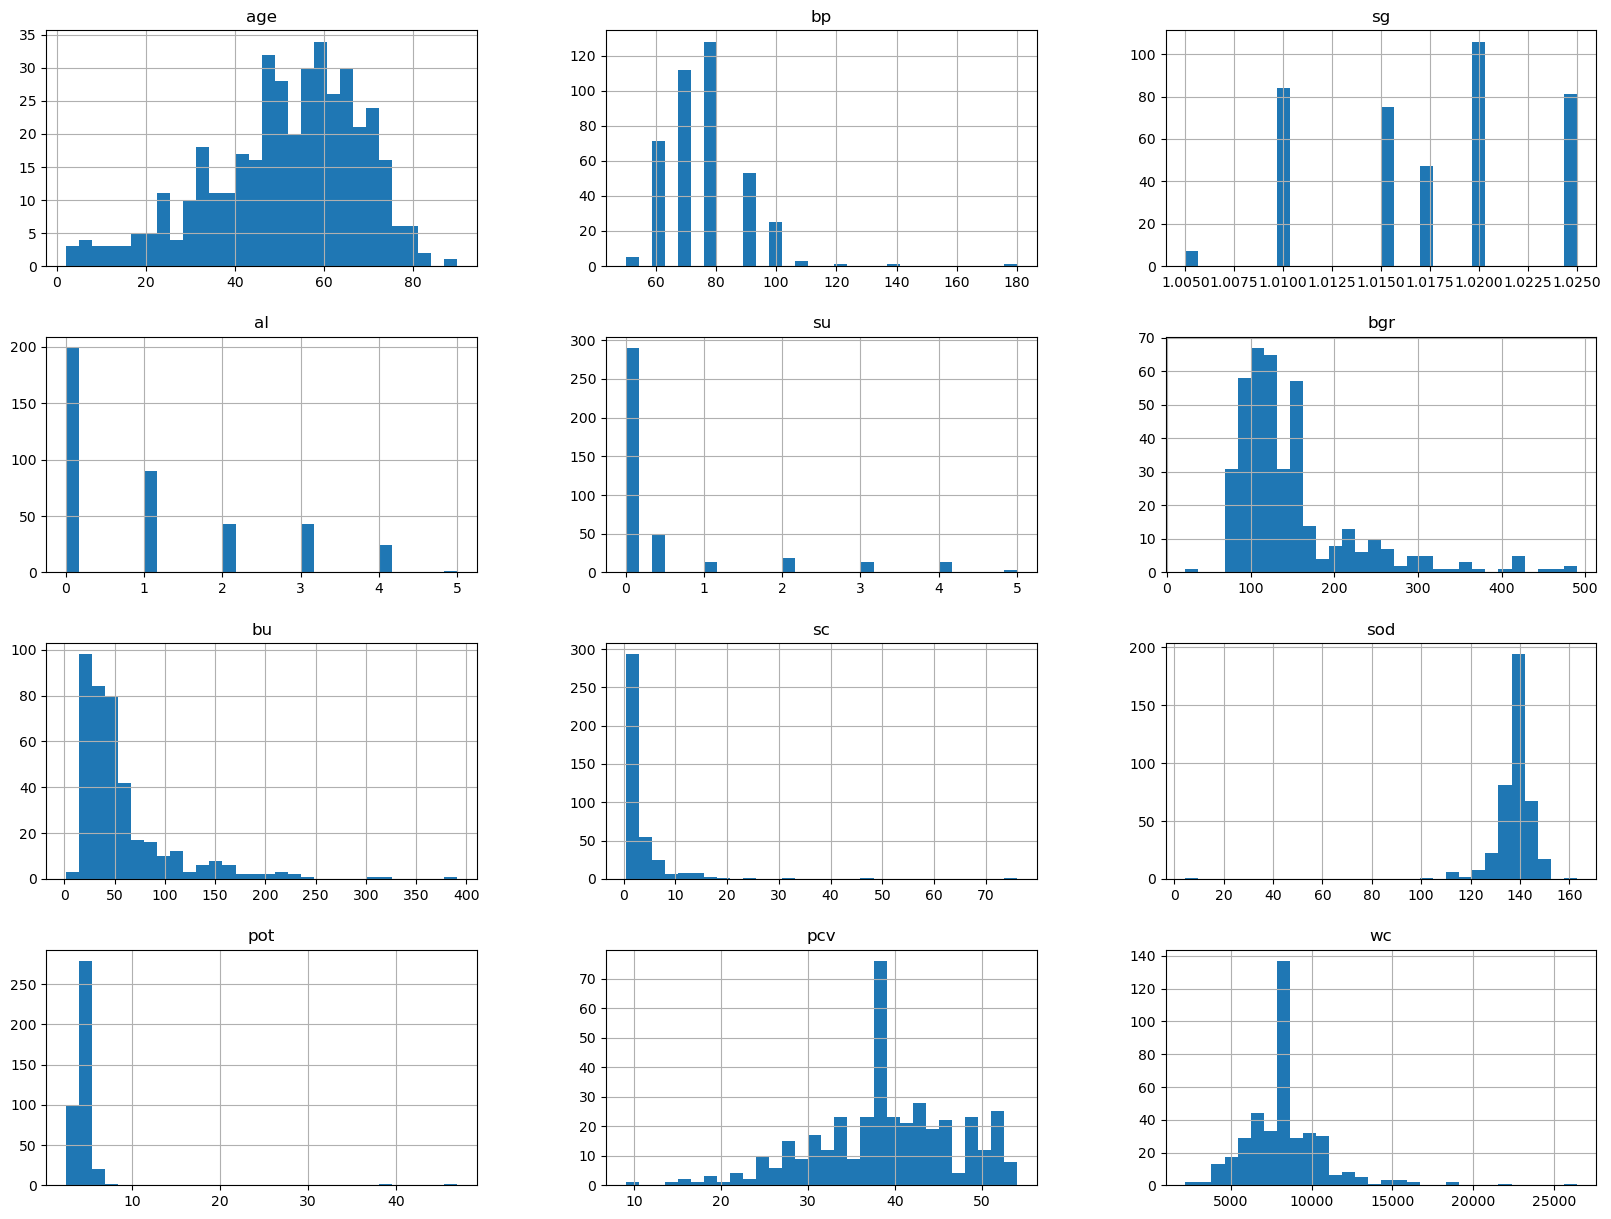

In [114]:
#Finding sample distribution of all features/columns.
raw_data.hist(figsize=(20,15), bins=30)

## Encoding text categorical values to numeric values in columns

In [115]:
raw_data['rbc'] = raw_data['rbc'].apply(lambda x: 0 if x=='normal' else 1)
raw_data['pc'] = raw_data['pc'].apply(lambda x: 0 if x=='normal' else 1)
raw_data['pcc'] = raw_data['pcc'].apply(lambda x: 0 if x=='notpresent' else 1)
raw_data['ba'] = raw_data['ba'].apply(lambda x: 0 if x=='notpresent' else 1)
raw_data['htn'] = raw_data['htn'].apply(lambda x: 0 if x=='no' else 1)
raw_data['dm'] = raw_data['dm'].apply(lambda x: 0 if x=='no' else 1)
raw_data['cad'] = raw_data['cad'].apply(lambda x: 0 if x=='no' else 1)
raw_data['appet'] = raw_data['appet'].apply(lambda x: 0 if x=='good' else 1)
raw_data['pe'] = raw_data['pe'].apply(lambda x: 0 if x=='no' else 1)
raw_data['ane'] = raw_data['ane'].apply(lambda x: 0 if x=='no' else 1)
raw_data['classification'] = raw_data['classification'].apply(lambda x: 0 if x=='ckd' else 1)

In [116]:
raw_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,...,4.627244,44.0,7800.0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,148.036517,...,4.627244,38.0,6000.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,...,4.627244,31.0,7500.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.000000,...,2.500000,32.0,6700.0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,...,4.627244,35.0,7300.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.000000,...,4.900000,47.0,6700.0,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.000000,...,3.500000,54.0,7800.0,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.000000,...,4.400000,49.0,6600.0,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.000000,...,4.900000,51.0,7200.0,0,0,0,0,0,0,1


In [117]:
temp_data = raw_data.copy()
temp_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,...,4.627244,44.0,7800.0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,148.036517,...,4.627244,38.0,6000.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,...,4.627244,31.0,7500.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.000000,...,2.500000,32.0,6700.0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,...,4.627244,35.0,7300.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.000000,...,4.900000,47.0,6700.0,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.000000,...,3.500000,54.0,7800.0,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.000000,...,4.400000,49.0,6600.0,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.000000,...,4.900000,51.0,7200.0,0,0,0,0,0,0,1


## Feature Selection

In [118]:
#Finding the correlation between all features to target label
corr_matrix = temp_data.corr()
corr_matrix['classification'].sort_values(ascending=False)

classification    1.000000
sg                0.698957
pcv               0.690060
sod               0.342288
pot              -0.076921
ba               -0.186871
wc               -0.205274
age              -0.225405
cad              -0.236088
pcc              -0.265313
rbc              -0.282642
bp               -0.290600
sc               -0.294079
ane              -0.325396
su               -0.327812
bu               -0.372033
pc               -0.375154
pe               -0.375154
appet            -0.393341
bgr              -0.401374
dm               -0.559060
htn              -0.590438
al               -0.599238
Name: classification, dtype: float64

In [119]:
#Since, 'pot' feature correlation is close to 0 which means, it is not much effecting target label.
raw_data = raw_data.drop(['pot'], axis=1)

## Normalizing the column values.

In [120]:
std_scaler = StandardScaler()
norm_feature_data = std_scaler.fit_transform(raw_data.iloc[:, :-1])
norm_feature_data = pd.DataFrame(norm_feature_data, columns=raw_data.columns[:-1])
norm_data = pd.concat([norm_feature_data, raw_data.iloc[:, [-1]]], axis=1)
norm_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,-0.205464,0.262338,0.483355,-0.013338,-0.437797,-0.36489,-0.484322,-0.342518,-0.241249,-0.361987,...,0.000000,0.628372,-0.240519,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084,0
1,-2.623810,-1.966580,0.483355,2.347516,-0.437797,-0.36489,-0.484322,-0.342518,-0.241249,0.000000,...,0.000000,-0.108649,-0.954786,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,0
2,0.620313,0.262338,-1.381391,0.773613,2.479925,-0.36489,-0.484322,-0.342518,-0.241249,3.681441,...,0.000000,-0.968506,-0.359563,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476,0
3,-0.205464,-0.480635,-2.313764,2.347516,-0.437797,-0.36489,2.064742,2.919556,-0.241249,-0.415543,...,-2.885831,-0.845669,-0.677016,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476,0
4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,-0.36489,-0.484322,-0.342518,-0.241249,-0.562820,...,0.000000,-0.477159,-0.438926,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207425,0.262338,0.483355,-0.800290,-0.437797,-0.36489,-0.484322,-0.342518,-0.241249,-0.107600,...,1.356638,0.996882,-0.677016,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
396,-0.559368,-0.480635,1.415727,-0.800290,-0.437797,-0.36489,-0.484322,-0.342518,-0.241249,-0.977874,...,0.377606,1.856739,-0.240519,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
397,-2.328890,0.262338,0.483355,-0.800290,-0.437797,-0.36489,-0.484322,-0.342518,-0.241249,-0.643153,...,-0.057519,1.242555,-0.716697,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
398,-2.033969,-1.223607,1.415727,-0.800290,-0.437797,-0.36489,-0.484322,-0.342518,-0.241249,-0.455709,...,-0.275081,1.488229,-0.478608,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1


## splitting the dataset into traning set and testing set.

In [121]:
# Here, we are using the stratified sample splitting so that equal ratio of both labeled data will be split into both training, testing sets.
strat_train_set = strat_test_set = None

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=400)
for train_index, test_index in split.split(norm_data, norm_data.iloc[:, -1:]):
    strat_train_set = norm_data.loc[train_index]
    strat_test_set = norm_data.loc[test_index]

strat_train_set

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pcv,wc,htn,dm,cad,appet,pe,ane,classification
374,1.623042e+00,0.262338,1.415727,-0.800290,-4.377969e-01,-0.364890,-0.484322,-0.342518,-0.241249,-0.495876,...,0.921513,0.137025,-0.161156,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
280,-2.644477e-01,0.262338,0.000000,0.000000,-5.398871e-17,-0.364890,-0.484322,-0.342518,-0.241249,-0.736875,...,0.703950,1.611066,-0.121474,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
269,-1.562097e+00,0.262338,1.415727,-0.800290,-4.377969e-01,-0.364890,-0.484322,-0.342518,-0.241249,-0.361987,...,0.486388,1.119719,-0.597652,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
73,4.191069e-16,1.748284,-0.449018,0.773613,-4.377969e-01,2.740554,2.064742,-0.342518,-0.241249,-0.254877,...,-0.601425,-3.056731,-0.835742,1.311903,-0.721743,-0.304789,-0.507801,2.064742,2.380476,0
200,2.271867e+00,1.005311,1.415727,-0.013338,-4.377969e-01,-0.364890,-0.484322,-0.342518,-0.241249,-0.120988,...,0.268825,-0.231486,-0.200837,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2.664088e-01,1.005311,-2.313764,2.347516,2.479925e+00,2.740554,2.064742,-0.342518,-0.241249,1.258062,...,0.268825,-1.582690,0.000000,1.311903,1.385535,-0.304789,1.969276,2.064742,2.380476,0
11,6.792972e-01,-0.480635,-1.381391,1.560565,-4.377969e-01,2.740554,2.064742,2.919556,-0.241249,3.105721,...,-0.710206,-0.845669,-1.550009,1.311903,1.385535,-0.304789,1.969276,2.064742,-0.420084,0
40,-3.234318e-01,1.005311,-1.381391,0.773613,-4.377969e-01,-0.364890,2.064742,-0.342518,-0.241249,-0.656542,...,0.000000,-0.845669,0.275341,1.311903,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,0
232,-8.749553e-02,1.005311,-0.449018,-0.013338,-4.377969e-01,2.740554,2.064742,-0.342518,-0.241249,0.000000,...,0.000000,0.000000,0.000000,-0.762252,-0.721743,-0.304789,-0.507801,2.064742,-0.420084,0


In [122]:
strat_test_set

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pcv,wc,htn,dm,cad,appet,pe,ane,classification
243,0.620313,1.005311,0.483355,0.773613,0.534777,-0.364890,-0.484322,-0.342518,-0.241249,0.280677,...,0.051263,0.996882,1.029290,1.311903,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,0
347,-0.500384,-1.223607,1.415727,-0.800290,-0.437797,-0.364890,-0.484322,-0.342518,-0.241249,-0.536042,...,0.703950,0.505535,-0.478608,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
29,0.974217,-0.480635,-2.313764,-0.013338,-0.437797,2.740554,2.064742,2.919556,-0.241249,0.000000,...,0.000000,-0.108649,0.000000,-0.762252,-0.721743,3.280961,-0.507801,-0.484322,-0.420084,0
344,0.738281,-1.223607,0.483355,-0.800290,-0.437797,-0.364890,-0.484322,-0.342518,-0.241249,-0.562820,...,1.356638,0.382698,-0.121474,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,-0.364890,-0.484322,-0.342518,-0.241249,-0.562820,...,0.000000,-0.477159,-0.438926,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,-0.854288,-1.223607,0.483355,-0.800290,-0.437797,-0.364890,-0.484322,-0.342518,-0.241249,-0.522653,...,0.377606,1.119719,-0.557971,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
366,0.502345,0.262338,1.415727,-0.800290,-0.437797,-0.364890,-0.484322,-0.342518,-0.241249,-0.897541,...,0.377606,0.874045,0.830883,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
385,0.679297,-0.480635,0.483355,-0.800290,-0.437797,-0.364890,-0.484322,-0.342518,-0.241249,-0.469098,...,0.921513,1.611066,-0.161156,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1
167,-1.031240,-0.480635,0.483355,-0.800290,-0.437797,2.740554,-0.484322,-0.342518,-0.241249,-0.120988,...,0.000000,0.382698,-2.462684,-0.762252,-0.721743,-0.304789,1.969276,-0.484322,-0.420084,0


## segregating the input features and target values in training set, testing set

In [123]:
X_train, y_train = strat_train_set.iloc[:, :-1], strat_train_set.iloc[:, -1]
X_test, y_test = strat_test_set.iloc[:, :-1], strat_test_set.iloc[:, -1]

## Prediction using Linear SVM Model (using SGD Classifier with loss = 'hinge')

In [124]:
sgd_clf = SGDClassifier(loss='hinge', shuffle=True, alpha=1, random_state=80)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=1, random_state=80)

In [125]:
#use the cross_val_score function to calculate the accuracy scores of predicting a random set of train data 5 times.
valid_accuracy_score_sgd_clf = cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')

#calculating the average accuracy score of 5 accuracy scores recorded.
avg_valild_accuracy_score_sgd_clf = np.mean(valid_accuracy_score_sgd_clf)
avg_valild_accuracy_score_sgd_clf

0.95

In [126]:
# Predict the test data using trained SGD Classifier model.
y_sgd_clf_pred = sgd_clf.predict(X_test)

# calculating the accuracy score, f1 score of test data prediction using SGD Classifier model with proper hyper parameter values.
acc_score_sgd_clf = accuracy_score(y_test, y_sgd_clf_pred)
f1_score_sgd_clf = f1_score(y_test, y_sgd_clf_pred)
precision_score_sgd_clf = precision_score(y_test, y_sgd_clf_pred)
recall_score_sgd_clf = recall_score(y_test, y_sgd_clf_pred)
print(acc_score_sgd_clf, f1_score_sgd_clf, precision_score_sgd_clf, recall_score_sgd_clf)

0.9375 0.923076923076923 0.8571428571428571 1.0


Text(45.722222222222214, 0.5, 'Actual')

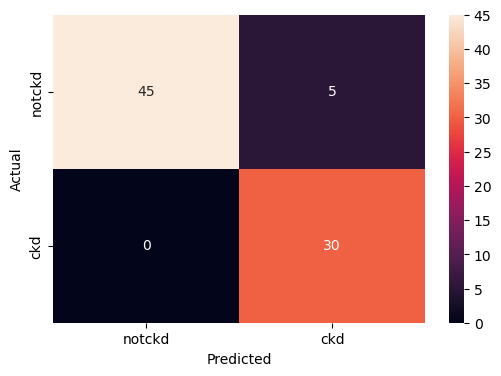

In [127]:
conf_mat_sgd_clf = confusion_matrix(y_test, y_sgd_clf_pred)
conf_matrix_sgd_clf_df = pd.DataFrame(conf_mat_sgd_clf, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_sgd_clf_df, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [128]:
#Identifying the mis classified instances from testing set.
res = y_test==y_sgd_clf_pred
res[res==False]

102    False
1      False
150    False
185    False
167    False
Name: classification, dtype: bool

## Prediction using KNN Model

In [129]:
knn_default_model = KNeighborsClassifier(n_neighbors=20)
knn_default_model.fit(X_train, y_train)
valid_accuracy_score_default_knn = cross_val_score(knn_default_model, X_train, y_train, cv=5, scoring='accuracy')
avg_valild_accuracy_score_default_knn = np.mean(valid_accuracy_score_default_knn)
avg_valild_accuracy_score_default_knn

0.89375

In [130]:
y_default_knn_pred = knn_default_model.predict(X_test)

# calculating the accuracy score, f1 score of test data prediction using KNN model with default hyper parameter values.
acc_score_default_knn = accuracy_score(y_test, y_default_knn_pred)
f1_score_default_knn = f1_score(y_test, y_default_knn_pred)
precision_score_default_knn = precision_score(y_test, y_default_knn_pred)
recall_score_default_knn = recall_score(y_test, y_default_knn_pred)
print(acc_score_default_knn, f1_score_default_knn, precision_score_default_knn, recall_score_default_knn)

0.925 0.9090909090909091 0.8333333333333334 1.0


Text(45.722222222222214, 0.5, 'Actual')

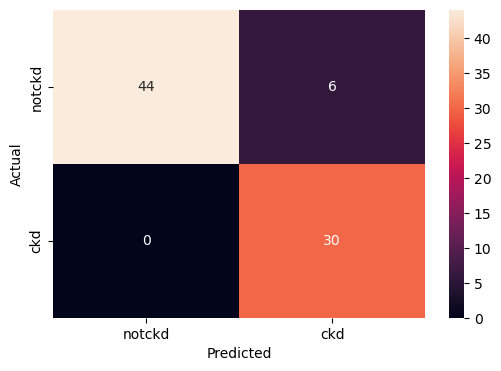

In [131]:
conf_mat_default_knn = confusion_matrix(y_test, y_default_knn_pred)
conf_matrix_default_knn_df = pd.DataFrame(conf_mat_default_knn, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_default_knn_df, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [132]:
#Identifying the mis classified instances using default KNN model from testing set.
res = y_test==y_default_knn_pred
res[res==False]

243    False
102    False
1      False
150    False
185    False
167    False
Name: classification, dtype: bool

## Prediction using Fine Tuned KNN Model

In [133]:
# Fine tuning the hyper parameter of KNN model using grid search CV.
search_params = {
    'n_neighbors': list(range(5, 50))
}

knn_tuned_model = KNeighborsClassifier(weights='distance')
grid_search_cv = GridSearchCV(knn_tuned_model, search_params, cv=7)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]})

In [134]:
# Print the best hyperparameters and their score
print("Best values for given hyperparameters:", grid_search_cv.best_params_)
print("Best scores for best selected hyper params :", grid_search_cv.best_score_)

Best values for given hyperparameters: {'n_neighbors': 5}
Best scores for best selected hyper params : 0.9591442374051071


In [135]:
knn_tuned_model = grid_search_cv.best_estimator_
knn_tuned_model

KNeighborsClassifier(weights='distance')

In [136]:
y_tuned_knn_pred = knn_tuned_model.predict(X_test)

#Calculating the accuracy score and f1 score of prediction made by fine tuned KNN model.
acc_score_tuned_knn = accuracy_score(y_test, y_tuned_knn_pred)
f1_score_tuned_knn = f1_score(y_test, y_tuned_knn_pred, average='weighted')
precision_score_tuned_knn = precision_score(y_test, y_tuned_knn_pred, average='micro')
recall_score_tuned_knn = recall_score(y_test, y_tuned_knn_pred, average='micro')
print(acc_score_tuned_knn, f1_score_tuned_knn, precision_score_tuned_knn, recall_score_tuned_knn)

0.95 0.9505208333333334 0.95 0.95


Text(45.722222222222214, 0.5, 'Actual')

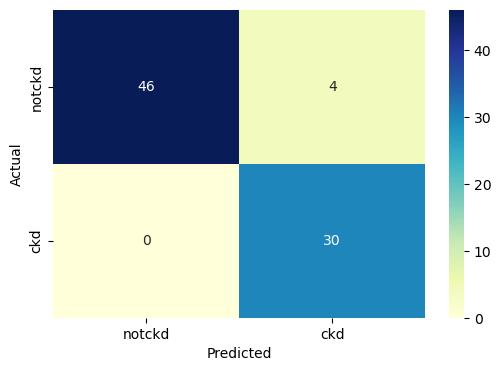

In [137]:
conf_mat_tuned_knn = confusion_matrix(y_test, y_tuned_knn_pred)
conf_matrix_tuned_knn_df = pd.DataFrame(conf_mat_tuned_knn, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_tuned_knn_df, annot = True, fmt = 'd', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [138]:
#Identifying the mis classified instances using fine tuned KNN model from testing set.
res = y_test==y_tuned_knn_pred
res[res==False]

243    False
102    False
185    False
167    False
Name: classification, dtype: bool

## Prediction using polynomial SVM Model

In [139]:
poly_svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=0.05)
poly_svm_clf.fit(X_train, y_train)

#use the cross_val_score function to calculate the accuracy scores of predicting a random set of train data 2 times.
valid_accuracy_score_poly_svm_clf = cross_val_score(poly_svm_clf, X_train, y_train, cv=2, scoring='accuracy')

#calculating the average accuracy score of 2 accuracy scores recorded.
avg_valild_accuracy_score_poly_svm_clf = np.mean(valid_accuracy_score_poly_svm_clf)
avg_valild_accuracy_score_poly_svm_clf

0.971875

In [140]:
y_poly_svm_pred = poly_svm_clf.predict(X_test)

# calculating the accuracy score, f1 score of test data prediction using polynomial SVM model with proper hyper parameter values.
acc_score_poly_svm = accuracy_score(y_test, y_poly_svm_pred)
f1_score_poly_svm = f1_score(y_test, y_poly_svm_pred)
precision_score_poly_svm = precision_score(y_test, y_poly_svm_pred)
recall_score_poly_svm = recall_score(y_test, y_poly_svm_pred)
print(acc_score_poly_svm, f1_score_poly_svm, precision_score_poly_svm, recall_score_poly_svm)

0.9625 0.9523809523809523 0.9090909090909091 1.0


Text(45.722222222222214, 0.5, 'Actual')

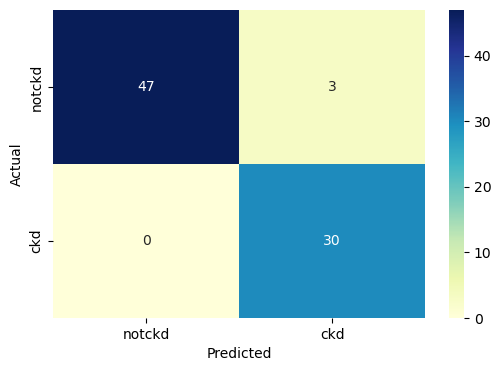

In [141]:
conf_mat_poly_svm = confusion_matrix(y_test, y_poly_svm_pred)
conf_matrix_poly_svm_df = pd.DataFrame(conf_mat_poly_svm, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_poly_svm_df, annot = True, fmt = 'g', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [142]:
#Identifying the mis classified instances using polynomial SVM model from testing set.
res = y_test==y_poly_svm_pred
res[res==False]

102    False
185    False
167    False
Name: classification, dtype: bool

## Prediction using VotingClassifier

In [154]:
log_clf = LogisticRegression()
svm_clf = SVC()
dtree_clf = DecisionTreeClassifier(max_depth=2)
estimators = [('lr', log_clf), ('svc', svm_clf), ('dt_clf', dtree_clf) ]
vt_clf = VotingClassifier(estimators=estimators, voting='hard')
vt_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svc', SVC()),
                             ('dt_clf', DecisionTreeClassifier(max_depth=2))])

In [144]:
#use the cross_val_score function to calculate the accuracy scores of predicting a random set of train data 2 times.
valid_accuracy_score_vot_clf = cross_val_score(vt_clf, X_train, y_train, cv=2, scoring='accuracy')

#calculating the average accuracy score of 2 accuracy scores recorded.
avg_valild_accuracy_score_vot_clf = np.mean(valid_accuracy_score_vot_clf)
avg_valild_accuracy_score_vot_clf

0.984375

In [145]:
y_vot_clf_pred = vt_clf.predict(X_test)

# calculating the accuracy score, f1 score of test data prediction using Voting Classifier model with proper hyper parameter values.
acc_score_vot_clf = accuracy_score(y_test, y_vot_clf_pred)
f1_score_vot_clf = f1_score(y_test, y_vot_clf_pred)
precision_score_vot_clf = precision_score(y_test, y_vot_clf_pred)
recall_score_vot_clf = recall_score(y_test, y_vot_clf_pred)
print(acc_score_vot_clf, f1_score_vot_clf, precision_score_vot_clf, recall_score_vot_clf)

0.9875 0.9836065573770492 0.967741935483871 1.0


Text(45.722222222222214, 0.5, 'Actual')

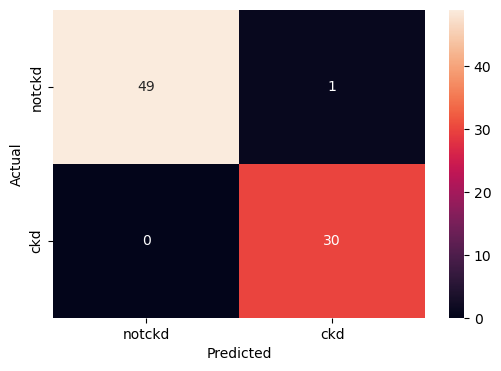

In [146]:
conf_mat_vot_clf = confusion_matrix(y_test, y_vot_clf_pred)
conf_matrix_vot_clf_df = pd.DataFrame(conf_mat_vot_clf, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_vot_clf_df, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [147]:
#Identifying the mis classified instances using Voting classifier model from testing set.
res = y_test==y_vot_clf_pred
res[res==False]

102    False
Name: classification, dtype: bool

## Prediction using RandomForest Classifier

In [148]:
rndf_clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=7, random_state=52)
rndf_clf.fit(X_train, y_train)
#use the cross_val_score function to calculate the accuracy scores of predicting a random set of train data 4 times.
valid_accuracy_score_rndf_clf = cross_val_score(rndf_clf, X_train, y_train, cv=4, scoring='accuracy')

#calculating the average accuracy score of 4 accuracy scores recorded.
avg_valild_accuracy_score_rndf_clf = np.mean(valid_accuracy_score_rndf_clf)
avg_valild_accuracy_score_rndf_clf

0.996875

In [149]:
y_rndf_clf_pred = rndf_clf.predict(X_test)

# calculating the accuracy score, f1 score of test data prediction using RandomForest Classifier model with proper hyper parameter values.
acc_score_rndf_clf = accuracy_score(y_test, y_rndf_clf_pred)
f1_score_rndf_clf = f1_score(y_test, y_rndf_clf_pred)
precision_score_rndf_clf = precision_score(y_test, y_rndf_clf_pred)
recall_score_rndf_clf = recall_score(y_test, y_rndf_clf_pred)
print(acc_score_rndf_clf, f1_score_rndf_clf, precision_score_rndf_clf, recall_score_rndf_clf)

0.9875 0.9836065573770492 0.967741935483871 1.0


Text(45.722222222222214, 0.5, 'Actual')

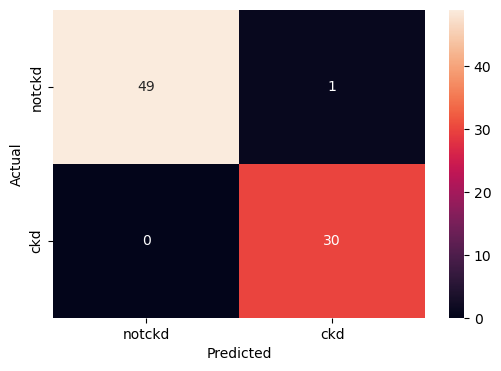

In [150]:
conf_mat_rndf_clf = confusion_matrix(y_test, y_rndf_clf_pred)
conf_matrix_rndf_clf_df = pd.DataFrame(conf_mat_rndf_clf, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix_rndf_clf_df, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [151]:
#Identifying the mis classified instances using RandomForest classifier model from testing set.
res = y_test==y_rndf_clf_pred
res[res==False]

167    False
Name: classification, dtype: bool

## Comparision of accuarcy score for all trained models.

In [152]:
acc_comparision_details = {'Accuracy Score': [acc_score_default_knn, acc_score_tuned_knn, acc_score_sgd_clf, acc_score_poly_svm, acc_score_vot_clf, acc_score_rndf_clf], 'f1 Score': [f1_score_default_knn, f1_score_tuned_knn, f1_score_sgd_clf, f1_score_poly_svm, f1_score_vot_clf, f1_score_rndf_clf], 'precision Score': [precision_score_default_knn, precision_score_tuned_knn, precision_score_sgd_clf, precision_score_poly_svm, precision_score_vot_clf, precision_score_rndf_clf], 'recall Score': [recall_score_default_knn, recall_score_tuned_knn, recall_score_sgd_clf, recall_score_poly_svm, recall_score_vot_clf, recall_score_rndf_clf]}
acc_comparision_details = pd.DataFrame(acc_comparision_details, index=['Default KNN Classifier', 'Tuned KNN Classifier', 'Linear SVM Classifier', 'Polynomial SVM Classifier', 'Voting Classifier', 'Random Forest Classifier'])
#acc_comparision_details.columns.name = 'accuracy'
acc_comparision_details = np.round(acc_comparision_details*100, 2)
acc_comparision_details

,Accuracy Score,f1 Score,precision Score,recall Score
Default KNN Classifier,92.50,90.91,83.33,100.0
Tuned KNN Classifier,95.00,95.05,95.00,95.0
Linear SVM Classifier,93.75,92.31,85.71,100.0
Polynomial SVM Classifier,96.25,95.24,90.91,100.0
Voting Classifier,98.75,98.36,96.77,100.0
Random Forest Classifier,98.75,98.36,96.77,100.0


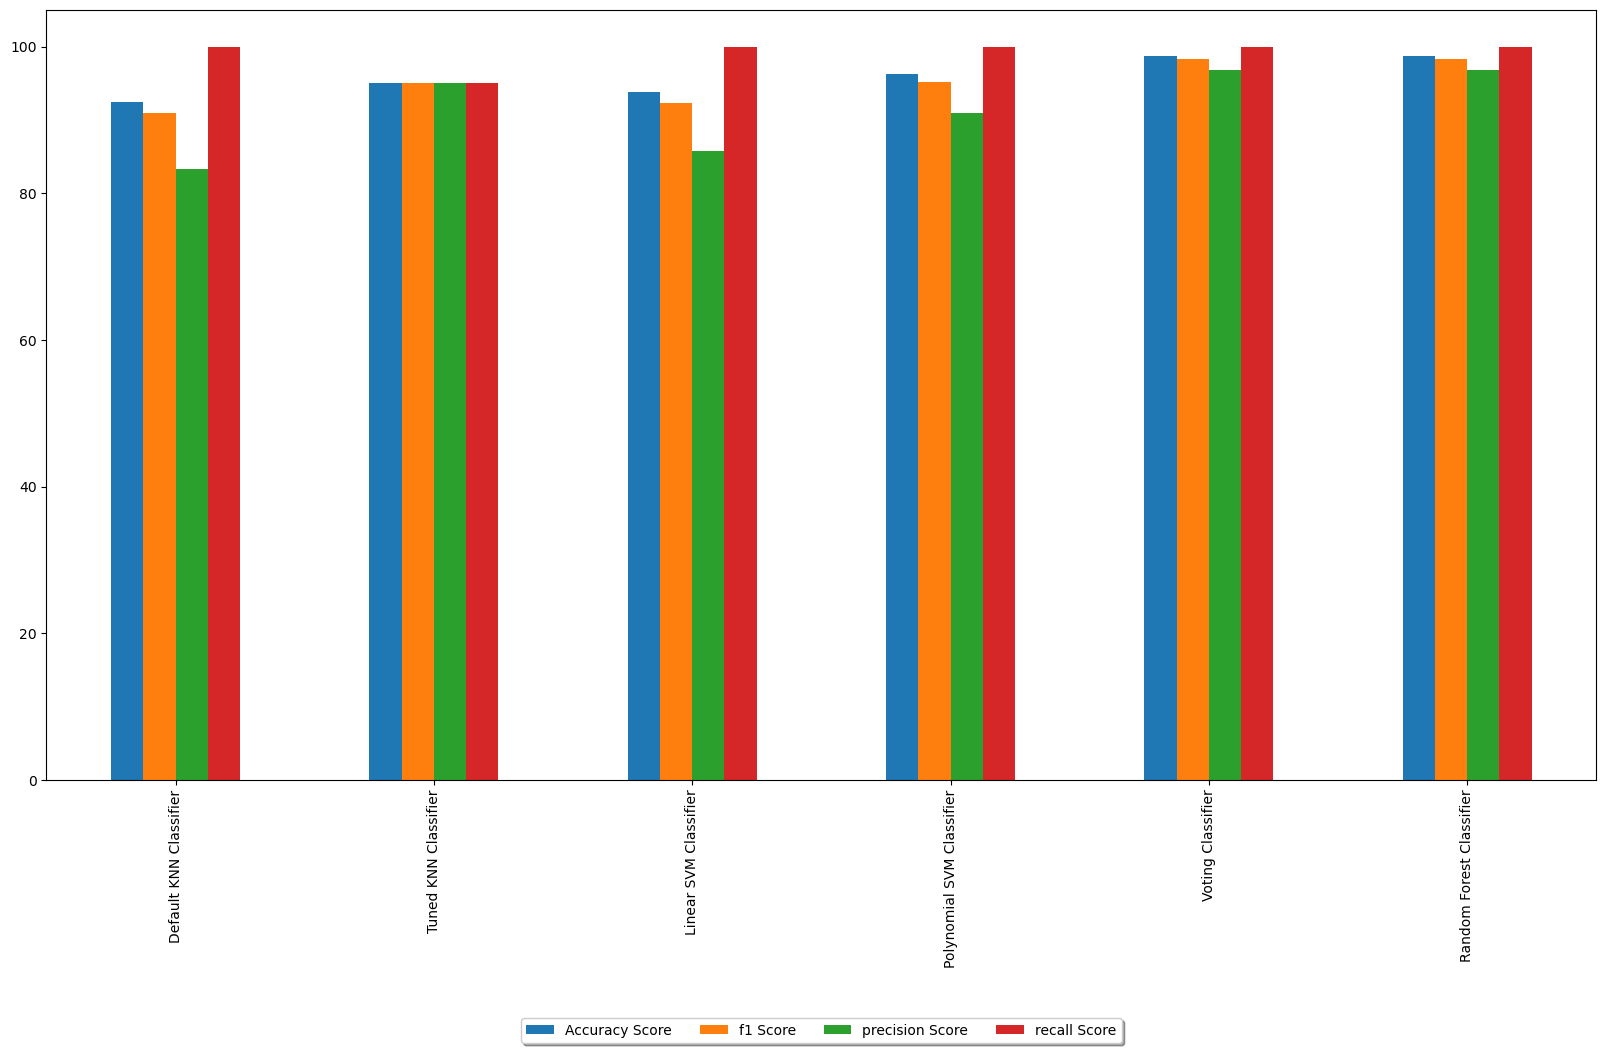

In [153]:
ax = acc_comparision_details.plot.bar(figsize=(20, 10))

# Adjusting the legend placement
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)
frame = legend.get_frame()
plt.show()

**Model Experimentation and Analysis:**

Since, most of the features are related to target lable linearly, i would like to try the linear SVM model too for the given data and obtained the 93+ % accuracy which is still not good and observed that, model is underfitting with linear SVM model too. 

Evaluated another model called polynomial SVM classifier with 3 degree to overcome the underfitting of linear SVM model. with polynomial SVM, we there is slight increase in accuracy and reached to 96+ % which better than all previous model's accuracies.

Majorly, built the voting classifier which is internally taking the votes from 3 diversified classifiers: Logistic regression classifier, SVM, Decision Tree classifier to generalize the prediction more better. However, got a little bit improvement in accuracy as expected and reached to 98% which is really a good accuracy.

Finally, tried with most powerfull, versatile model called RandomForest Classifier with 50 internal decision tree classifiers in it. Got an excellent accuary of almost 99% out of all models tried.

In summary, exploration of various models aimed to find the optimal balance between accuracy and generalization. The progression from linear to polynomial models, and ultimately to ensemble and Random Forest models, showcased a steady improvement in accuracy and predictive performance.